In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train_LZdllcl.csv')



In [3]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
df.isna().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [5]:
df['previous_year_rating'].isna().sum()

4124

In [6]:
df.dropna(inplace=True)

In [7]:
df.isna().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [8]:
df.select_dtypes(include='object')

,department,region,education,gender,recruitment_channel
0,Sales & Marketing,region_7,Master's & above,f,sourcing
1,Operations,region_22,Bachelor's,m,other
2,Sales & Marketing,region_19,Bachelor's,m,sourcing
3,Sales & Marketing,region_23,Bachelor's,m,other
4,Technology,region_26,Bachelor's,m,other
...,...,...,...,...,...
54802,Sales & Marketing,region_14,Bachelor's,m,other
54803,Technology,region_14,Bachelor's,m,sourcing
54804,Operations,region_27,Master's & above,f,other
54805,Analytics,region_1,Bachelor's,m,other


In [9]:
df['department'].unique()

array(['Sales & Marketing', 'Operations', 'Technology', 'Analytics',
       'R&D', 'Procurement', 'Finance', 'HR', 'Legal'], dtype=object)

In [10]:
df['region'].unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_32', 'region_6', 'region_33', 'region_8',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

In [11]:
df['education'].unique()

array(["Master's & above", "Bachelor's", 'Below Secondary'], dtype=object)

In [12]:
df['recruitment_channel'].unique()

array(['sourcing', 'other', 'referred'], dtype=object)

In [13]:
j = pd.get_dummies(df[['gender','education','recruitment_channel']],drop_first=True)

In [14]:
df = pd.concat([df,j],axis=1)

In [15]:
df.drop(columns=['gender','education','recruitment_channel','employee_id'],inplace=True)

In [16]:
df

,department,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,gender_m,education_Below Secondary,education_Master's & above,recruitment_channel_referred,recruitment_channel_sourcing
0,Sales & Marketing,region_7,1,35,5.0,8,1,0,49,0,0,0,1,0,1
1,Operations,region_22,1,30,5.0,4,0,0,60,0,1,0,0,0,0
2,Sales & Marketing,region_19,1,34,3.0,7,0,0,50,0,1,0,0,0,1
3,Sales & Marketing,region_23,2,39,1.0,10,0,0,50,0,1,0,0,0,0
4,Technology,region_26,1,45,3.0,2,0,0,73,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,Sales & Marketing,region_14,2,31,1.0,2,0,0,49,0,1,0,0,0,0
54803,Technology,region_14,1,48,3.0,17,0,0,78,0,1,0,0,0,1
54804,Operations,region_27,1,37,2.0,6,0,0,56,0,0,0,1,0,0
54805,Analytics,region_1,1,27,5.0,3,1,0,79,0,1,0,0,0,0


In [17]:
from sklearn.preprocessing import LabelEncoder


In [18]:
g =LabelEncoder()

In [19]:
df['department'] =g.fit_transform(df['department'])

In [20]:
df['region']=g.fit_transform(df['region'])

In [21]:
df.head()

,department,region,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted,gender_m,education_Below Secondary,education_Master's & above,recruitment_channel_referred,recruitment_channel_sourcing
0,7,31,1,35,5.0,8,1,0,49,0,0,0,1,0,1
1,4,14,1,30,5.0,4,0,0,60,0,1,0,0,0,0
2,7,10,1,34,3.0,7,0,0,50,0,1,0,0,0,1
3,7,15,2,39,1.0,10,0,0,50,0,1,0,0,0,0
4,8,18,1,45,3.0,2,0,0,73,0,1,0,0,0,0


<AxesSubplot:>

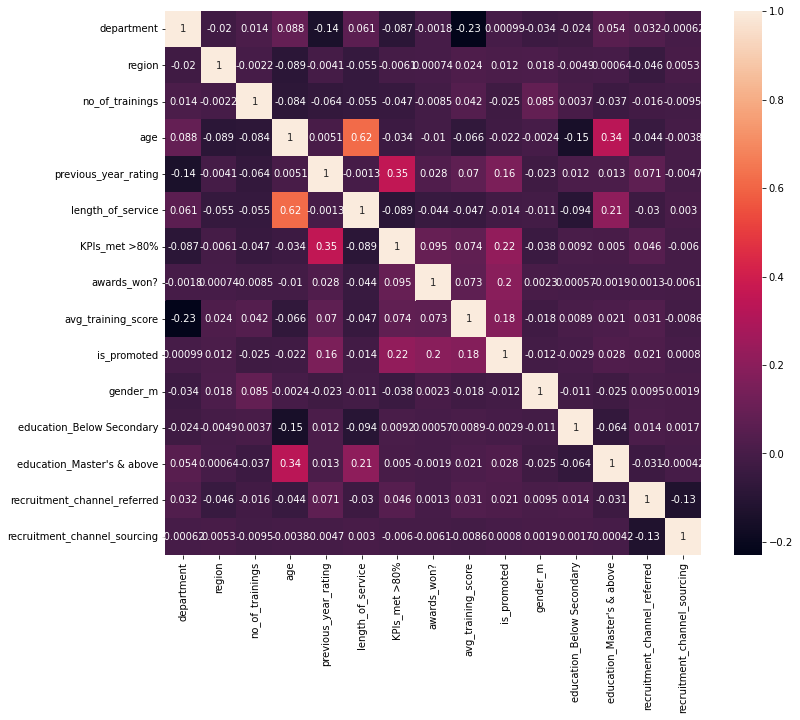

In [22]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,fmt='.2g')

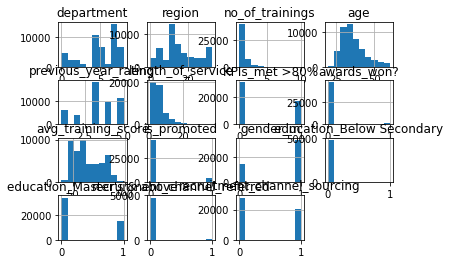

In [23]:
df.hist()
plt.show()

In [24]:
x= df.drop(columns='is_promoted')

In [25]:
y = df.is_promoted

In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
a = MinMaxScaler()

In [28]:
x = pd.DataFrame(a.fit_transform(x),columns=x.columns)

In [29]:
y.value_counts()

0    44428
1     4232
Name: is_promoted, dtype: int64

In [38]:
from imblearn.over_sampling import SMOTENC
oversample = SMOTENC(categorical_features=[0,1,2,3,4,9,10,8], random_state = 100)
x_new, y_new = oversample.fit_resample(x, y)

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_new,y_new,train_size=0.8,random_state=42)

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
model = LogisticRegression()

In [42]:
model.fit(x_train,y_train)

LogisticRegression()

In [43]:
y_pred= model.predict(x_test)

In [44]:
model.score(x_train,y_train)*100

74.37820043891735

In [45]:
model.score(x_test,y_test)*100

74.34728786855727

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rd = RandomForestClassifier()

In [48]:
rd.fit(x_train,y_train)

RandomForestClassifier()

In [49]:
y_pred = rd.predict(x_test)

In [50]:
rd.score(x_train,y_train)*100

99.9690507005796

In [51]:
rd.score(x_test,y_test)*100

94.33941030835021